In [1]:
import pandas as pd

import csv
import re # for regular expression
import string
from datetime import datetime

import nltk 
from nltk.tokenize import RegexpTokenizer # devide the words 
from collections import Counter #count the number of word for each list 

import numpy as np 
import matplotlib.pyplot as plt

import seaborn


import plotly
#import plotly.plotly as py
import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='XXXXXX', api_key='XXXXXXX')

%matplotlib inline


In [2]:
!pwd

/Users/lama/Desktop/data mining techniques


In [3]:
# read csv file and save it in a data frame
#path = '/Users/aljoharaalrshaid/Downloads/'
data_df=pd.read_csv("HittenTweetsWithPredictions.csv") 

In [4]:
# how much data do I have?
len(data_df)

808

In [5]:
# How about if I want to see part of the data?
data_df.head()

,replies,retweets,favorites,text,day,time,tokens,normalized,tokenized,predictions
0,0,0,0,وماذا عن إزعاج ما يزيد على ستة أشهر لأحياء سكن...,02/08/2020,09:16,"['وماذا', 'إزعاج', 'يزيد', 'ستة', 'أشهر', 'لأح...",وماذا ازعاج يزيد سته اشهر لاحياء سكنيه والاف ...,"['وماذا', 'ازعاج', 'يزيد', 'سته', 'اشهر', 'لاح...",negative
1,0,0,0,عدلك يا رب,02/04/2020,22:03,"['عدلك', 'رب']",عدلك رب,"['عدلك', 'رب']",positive
2,1,0,0,إلا قرقعة ودوشة قارفينا ببيتي قال فن قال,24/01/2020,20:02,"['قرقعة', 'ودوشة', 'قارفينا', 'ببيتي', 'قال', ...",قرقعه ودوشه قارفينا بيتي قال فن قال,"['قرقعه', 'ودوشه', 'قارفينا', 'بيتي', 'قال', '...",negative
3,1,0,0,٦ شهور محبورة اعيش ببيتي والبوليفارد يردح على ...,21/01/2020,21:03,"['٦', 'شهور', 'محبورة', 'اعيش', 'ببيتي', 'والب...",٦ شهور محبوره اعيش بيتي والبوليفارد يردح راسي...,"['٦', 'شهور', 'محبوره', 'اعيش', 'بيتي', 'والبو...",negative
4,0,0,0,في شويه معرصين حطين الصورة دي انا مش مطالبه ا...,19/01/2020,21:59,"['شويه', 'معرصين', 'حطين', 'الصورة', 'دي', 'ان...",شويه معرصين حطين الصوره دي انا مش مطالبه اقعد...,"['شويه', 'معرصين', 'حطين', 'الصوره', 'دي', 'ان...",negative


In [6]:
# remove the "Neutral" class
data_df=data_df[data_df['predictions'] != "neutral"]
data_df.head()

,replies,retweets,favorites,text,day,time,tokens,normalized,tokenized,predictions
0,0,0,0,وماذا عن إزعاج ما يزيد على ستة أشهر لأحياء سكن...,02/08/2020,09:16,"['وماذا', 'إزعاج', 'يزيد', 'ستة', 'أشهر', 'لأح...",وماذا ازعاج يزيد سته اشهر لاحياء سكنيه والاف ...,"['وماذا', 'ازعاج', 'يزيد', 'سته', 'اشهر', 'لاح...",negative
1,0,0,0,عدلك يا رب,02/04/2020,22:03,"['عدلك', 'رب']",عدلك رب,"['عدلك', 'رب']",positive
2,1,0,0,إلا قرقعة ودوشة قارفينا ببيتي قال فن قال,24/01/2020,20:02,"['قرقعة', 'ودوشة', 'قارفينا', 'ببيتي', 'قال', ...",قرقعه ودوشه قارفينا بيتي قال فن قال,"['قرقعه', 'ودوشه', 'قارفينا', 'بيتي', 'قال', '...",negative
3,1,0,0,٦ شهور محبورة اعيش ببيتي والبوليفارد يردح على ...,21/01/2020,21:03,"['٦', 'شهور', 'محبورة', 'اعيش', 'ببيتي', 'والب...",٦ شهور محبوره اعيش بيتي والبوليفارد يردح راسي...,"['٦', 'شهور', 'محبوره', 'اعيش', 'بيتي', 'والبو...",negative
4,0,0,0,في شويه معرصين حطين الصورة دي انا مش مطالبه ا...,19/01/2020,21:59,"['شويه', 'معرصين', 'حطين', 'الصورة', 'دي', 'ان...",شويه معرصين حطين الصوره دي انا مش مطالبه اقعد...,"['شويه', 'معرصين', 'حطين', 'الصوره', 'دي', 'ان...",negative


In [7]:
# change values to numeric
data_df['predictions'] = data_df['predictions'].map({'positive': 1, 'negative': 0}) 
data_df.head(5)

,replies,retweets,favorites,text,day,time,tokens,normalized,tokenized,predictions
0,0,0,0,وماذا عن إزعاج ما يزيد على ستة أشهر لأحياء سكن...,02/08/2020,09:16,"['وماذا', 'إزعاج', 'يزيد', 'ستة', 'أشهر', 'لأح...",وماذا ازعاج يزيد سته اشهر لاحياء سكنيه والاف ...,"['وماذا', 'ازعاج', 'يزيد', 'سته', 'اشهر', 'لاح...",0
1,0,0,0,عدلك يا رب,02/04/2020,22:03,"['عدلك', 'رب']",عدلك رب,"['عدلك', 'رب']",1
2,1,0,0,إلا قرقعة ودوشة قارفينا ببيتي قال فن قال,24/01/2020,20:02,"['قرقعة', 'ودوشة', 'قارفينا', 'ببيتي', 'قال', ...",قرقعه ودوشه قارفينا بيتي قال فن قال,"['قرقعه', 'ودوشه', 'قارفينا', 'بيتي', 'قال', '...",0
3,1,0,0,٦ شهور محبورة اعيش ببيتي والبوليفارد يردح على ...,21/01/2020,21:03,"['٦', 'شهور', 'محبورة', 'اعيش', 'ببيتي', 'والب...",٦ شهور محبوره اعيش بيتي والبوليفارد يردح راسي...,"['٦', 'شهور', 'محبوره', 'اعيش', 'بيتي', 'والبو...",0
4,0,0,0,في شويه معرصين حطين الصورة دي انا مش مطالبه ا...,19/01/2020,21:59,"['شويه', 'معرصين', 'حطين', 'الصورة', 'دي', 'ان...",شويه معرصين حطين الصوره دي انا مش مطالبه اقعد...,"['شويه', 'معرصين', 'حطين', 'الصوره', 'دي', 'ان...",0


In [8]:
# idneitfy the data and the labels
data= data_df['tokenized'] #the independent variable
target= data_df['predictions'] #the dependent variable in logistic regression should be a
#binary variable (0 for -ve and 1 for +ve)

In [9]:
data_df['predictions'].value_counts()


0    423
1    113
Name: predictions, dtype: int64

In [10]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [11]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(data)
X.shape

(536, 4431)

In [12]:
# Training Phase
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=0) 
#y is the prediction values (-ve or +ve), train_test_split() it splits the arrays X(tweets) and 
#traget (prediction values) randomly into 4 variables (X_train, X_test, y_train and y_test).

In [13]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(359, 4431) (177, 4431) (359,) (177,)


In [14]:
# build the second classifer, logsitic regrssion 
classifier_log =  LogisticRegression().fit(X_train,y_train) #here we have entered the training data on the model
#classifier_log is the estimator
#the next step we will enter x_test and y_test

In [15]:
print("Logisitic Accuracy: %.2F"%classifier_log.score(X_test, y_test))
results_log = cross_val_score(classifier_log, X,target, cv=10) 
#classifier_log is the estimator
#X is array of data, in our case the Tweets
#The target variable is the variable we're trying to predict(+ve and -ve values)
#cv stands for cross validation


print("\n10-fold cross-validation:")
print(results_log)


print("The average accuracy of the Logisitic classifier is : %.2f" % np.mean(results_log))
print("\nConfusion matrix of the Logisitic classifier:")
predicted_log= classifier_log.predict(X_test)
print(confusion_matrix(y_test,predicted_log))


print("\nClassification_report of Logisitic classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")

Logisitic Accuracy: 0.81

10-fold cross-validation:
[0.7962963  0.7962963  0.7962963  0.77777778 0.77777778 0.77777778
 0.79245283 0.81132075 0.79245283 0.79245283]
The average accuracy of the Logisitic classifier is : 0.79

Confusion matrix of the Logisitic classifier:
[[144   0]
 [ 33   0]]

Classification_report of Logisitic classifier:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       144
           1       0.00      0.00      0.00        33

    accuracy                           0.81       177
   macro avg       0.41      0.50      0.45       177
weighted avg       0.66      0.81      0.73       177

----------------------------------------------------------------------------


/Users/lama/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [16]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_log.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

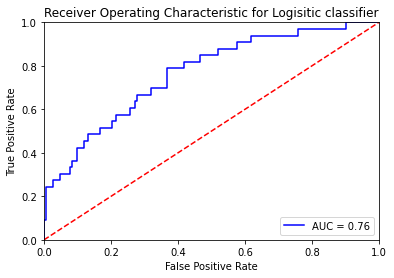

In [17]:
# polt AUC
plt.title('Receiver Operating Characteristic for Logisitic classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()